In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [4]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [6]:
len(twenty_train.data)

2257

In [7]:
twenty_train.data[0]

'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

In [8]:
twenty_train.target[0]

1

### Extracting features from text files

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
count_vect = CountVectorizer()

In [12]:
X_train_counts = count_vect.fit_transform(twenty_train.data)

In [14]:
X_train_counts.shape

(2257, 35788)

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

In [16]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)

In [17]:
X_train_tf = tf_transformer.transform(X_train_counts)

In [18]:
X_train_tf.shape

(2257, 35788)

In [21]:
tfidf_transformer = TfidfTransformer()

In [22]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

### Naive Bayes varieties
* MultinomialNB  - Multi class classification

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
clf = MultinomialNB().fit(X_train_counts, twenty_train.target)

In [30]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']

In [31]:
X_new_counts = count_vect.transform(docs_new)

In [32]:
clf.predict(X_new_counts)

array([3, 1], dtype=int64)

In [33]:
docs_new = ['love all']

In [34]:
X_new_counts = count_vect.transform(docs_new)

In [35]:
clf.predict(X_new_counts)

array([3], dtype=int64)

### Building Pipeline

In [36]:
from sklearn.pipeline import Pipeline

In [78]:
text_clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf',MultinomialNB())])

In [79]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [39]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [40]:
docs_test = twenty_test.data

In [42]:
predicted = text_clf.predict(docs_test)

In [44]:
res = predicted == twenty_test.target

In [46]:
import numpy as np

In [47]:
np.mean(res)

0.83488681757656458

In [48]:
text_clf.score(docs_test, twenty_test.target)

0.83488681757656458

In [49]:
from sklearn.linear_model import SGDClassifier

In [51]:
text_clf = Pipeline([('vect', CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf',SGDClassifier(max_iter=5, tol=None))])

In [52]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [53]:
text_clf.score(docs_test, twenty_test.target)

0.92476697736351532

In [54]:
from sklearn import metrics

In [59]:
mat = metrics.confusion_matrix(twenty_test.target, predicted)

In [56]:
twenty_test.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [57]:
import matplotlib.pyplot as plt

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

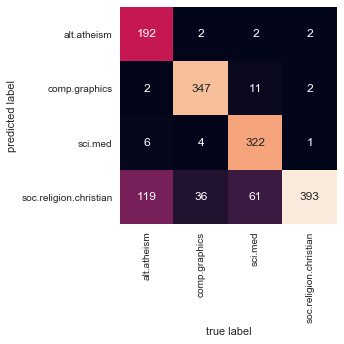

In [61]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=twenty_test.target_names, yticklabels=twenty_test.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Parameter tuning using grid search

In [62]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf':(True, False),
              'clf__alpha':(1e-2,1e-3),}

In [67]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [69]:
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [70]:
gs_clf.best_score_

0.96366858661940624

In [71]:
gs_clf.best_params_

{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

In [72]:
gs_clf.best_estimator_

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [80]:
text_clf.predict_proba(['good god'])

array([[ 0.25388031,  0.05928638,  0.05415454,  0.63267877]])